In [20]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import os


In [21]:
df = pd.read_csv("data.csv")

In [22]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [24]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [25]:
df.shape

(569, 33)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [26]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [27]:
# Drop the column 'Unnamed: 32' from the dataframe, as it is not needed
df.drop('Unnamed: 32',axis=1, inplace=True)

# Drop the column 'id' from the dataframe, as it is not a relevant feature
df.drop('id',axis=1, inplace=True)

# Create a list of all the feature names, excluding the target variable 'diagnosis'
feature_list = df.loc[:, df.columns != 'diagnosis'].columns.values.tolist()

In [28]:
# Calculate basic statistics for each column in dataframe
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [29]:
# Function to detect outliers in dataset
def detect_outliers(df,features):
    outlier_indices = [] # Initialize list of outlier indices

    # Iterate over features
    for i in features:
        # Calculate 1st, 3rd quartiles and IQR
        Q1 = np.percentile(df[i],25)
        Q3 = np.percentile(df[i],75)
        IQR = Q3 - Q1

        # Compute outlier step
        outlier_step = IQR * 1.5

        # Determine indices of outliers in current feature
        outlier_list_col = df[(df[i] < Q1 - outlier_step) | (df[i] > Q3 + outlier_step)].index

        # Append outlier indices to list
        outlier_indices.extend(outlier_list_col)

    # Count number of outlier indices for each data point
    outlier_indices = Counter(outlier_indices)

    # Select rows with more than four outlier indices
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > 4)

    # Return list of outlier indices
    return multiple_outliers

In [30]:
outlier_indices = detect_outliers(df, feature_list)
print("Outlier indices:", outlier_indices)



Outlier indices: [82, 108, 122, 164, 180, 202, 212, 236, 339, 352, 369, 461, 503, 521, 219, 265, 562, 23, 250, 272, 368, 563, 564, 3, 504, 0, 9, 12, 78, 190, 258, 351, 567, 68, 152, 176, 376, 379, 505, 42, 138, 290, 366, 213]


In [31]:
df.loc[detect_outliers(df,feature_list)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,M,25.220,24.91,171.50,1878.0,0.10630,0.26650,0.3339,0.18450,0.1829,...,30.00,33.62,211.70,2562.0,0.15730,0.6076,0.6476,0.2867,0.2355,0.10510
108,M,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.4264,0.18230,0.2556,...,28.40,28.01,206.80,2360.0,0.17010,0.6997,0.9608,0.2910,0.4055,0.09789
122,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.4268,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.16960,0.4244,0.5803,0.2248,0.3222,0.08009
164,M,23.270,22.04,152.10,1686.0,0.08439,0.11450,0.1324,0.09702,0.1801,...,28.01,28.22,184.20,2403.0,0.12280,0.3583,0.3948,0.2346,0.3589,0.09187
180,M,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.2871,0.18780,0.1800,...,33.12,32.85,220.80,3216.0,0.14720,0.4034,0.5340,0.2688,0.2856,0.08082
202,M,23.290,26.67,158.90,1685.0,0.11410,0.20840,0.3523,0.16200,0.2200,...,25.12,32.68,177.00,1986.0,0.15360,0.4167,0.7892,0.2733,0.3198,0.08762
212,M,28.110,18.47,188.50,2499.0,0.11420,0.15160,0.3201,0.15950,0.1648,...,28.11,18.47,188.50,2499.0,0.11420,0.1516,0.3201,0.1595,0.1648,0.05525
236,M,23.210,26.97,153.50,1670.0,0.09509,0.16820,0.1950,0.12370,0.1909,...,31.01,34.51,206.00,2944.0,0.14810,0.4126,0.5820,0.2593,0.3103,0.08677
339,M,23.510,24.27,155.10,1747.0,0.10690,0.12830,0.2308,0.14100,0.1797,...,30.67,30.73,202.40,2906.0,0.15150,0.2678,0.4819,0.2089,0.2593,0.07738
352,M,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.3368,0.19130,0.1956,...,33.13,23.58,229.30,3234.0,0.15300,0.5937,0.6451,0.2756,0.3690,0.08815


In [32]:
df = df.drop(outlier_indices, axis = 0).reset_index(drop=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
3,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
4,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
521,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
522,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
523,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


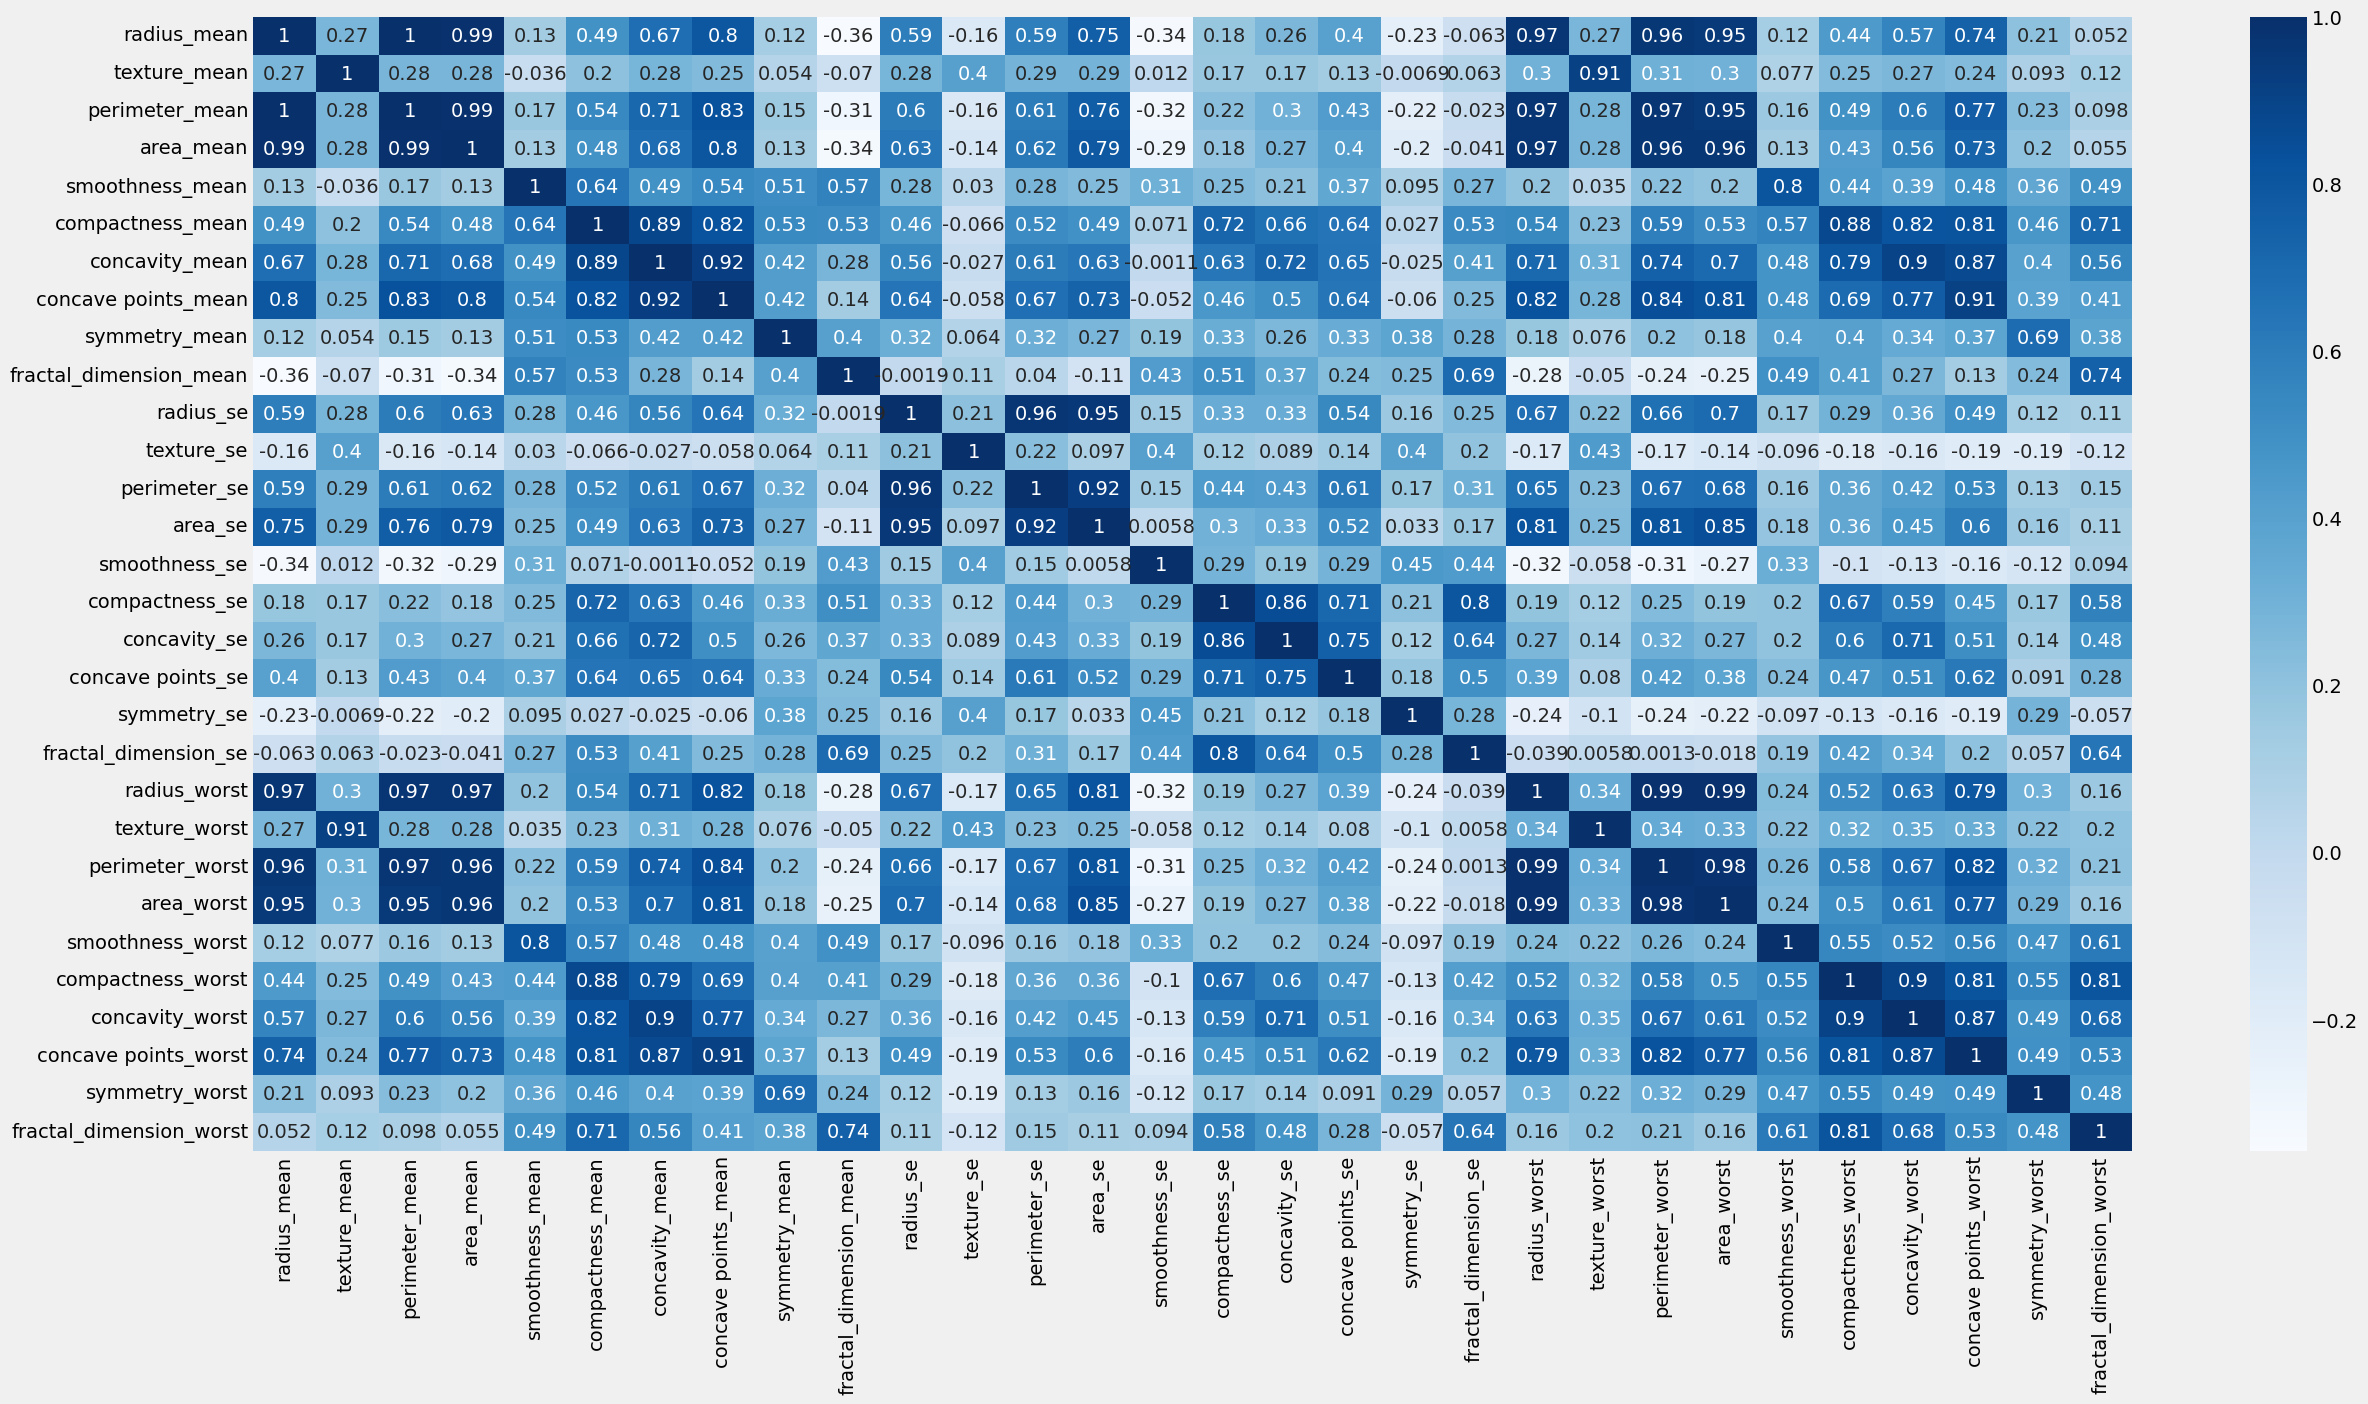

In [33]:
# Calculate correlation matrix for dataset
corr = df.loc[:, df.columns != 'diagnosis'].corr()

# Create heatmap to visualize correlation matrix
plt.figure(figsize=(27,14))
sns.heatmap(corr, annot=True, cmap="Blues")

# Display heatmap
plt.show()

In [34]:
# Create a new dataframe X that contains all the features except the target variable 'diagnosis'
X = df.drop("diagnosis",axis=1)

# Create a new series Y that contains only the target variable 'diagnosis'
Y = df["diagnosis"]

In [35]:
# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Perform label encoding on the target variable Y
# This will transform the categorical labels into numerical ones
Y = le.fit_transform(Y)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Create an instance of the StandardScaler class
sc = StandardScaler()

# Fit and transform the training data using the StandardScaler object
# This will standardize the features by removing the mean and scaling to unit variance
x_train =  sc.fit_transform(x_train)

# Transform the testing data using the same StandardScaler object
# This will use the same mean and variance as the training data
x_test = sc.transform(x_test)
# Create an instance of the Sequential class
model = Sequential()

# Add a Dense layer with 16 units, relu activation and input dimension of 30
model.add(Dense(16,activation = 'relu',input_dim=30))

# Add a Dropout layer with 0.6 dropout rate to prevent overfitting
model.add(Dropout(0.6))

# Add another Dense layer with 32 units and relu activation
model.add(Dense(32,activation = 'relu'))

# Add another Dropout layer with 0.6 dropout rate
model.add(Dropout(0.6))

# Add a final Dense layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1,activation = 'sigmoid'))

# Compile the model with adam optimizer, binary crossentropy loss and accuracy metric
model.compile(optimizer = 'adam',loss = "binary_crossentropy",metrics=["accuracy"])

# Print the summary of the model
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                496       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1073 (4.19 KB)
Trainable params: 1073 (4.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
11/11 [==============================] - 1s 23ms/step - loss: 0.8281 - accuracy: 0.5179 - val_loss: 0.6922 - val_accuracy: 0.6071
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.8020 - accuracy: 0.5833 - val_loss: 0.6206 - val_accuracy: 0.6905
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6280 - accuracy: 0.6696 - val_loss: 0.5623 - val_accuracy: 0.7262
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6411 - accuracy: 0.6696 - val_loss: 0.5155 - val_accuracy: 0.7976
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.5966 - accuracy: 0.6786 - val_loss: 0.4765 - val_accuracy: 0.8214
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.5426 - accuracy: 0.7173 - val_loss: 0.4430 - val_accuracy: 0.8333
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.5749 - accuracy: 0.7440 - val_loss: 0.4124 - val_accuracy: 0.8571
Epoch 8/100


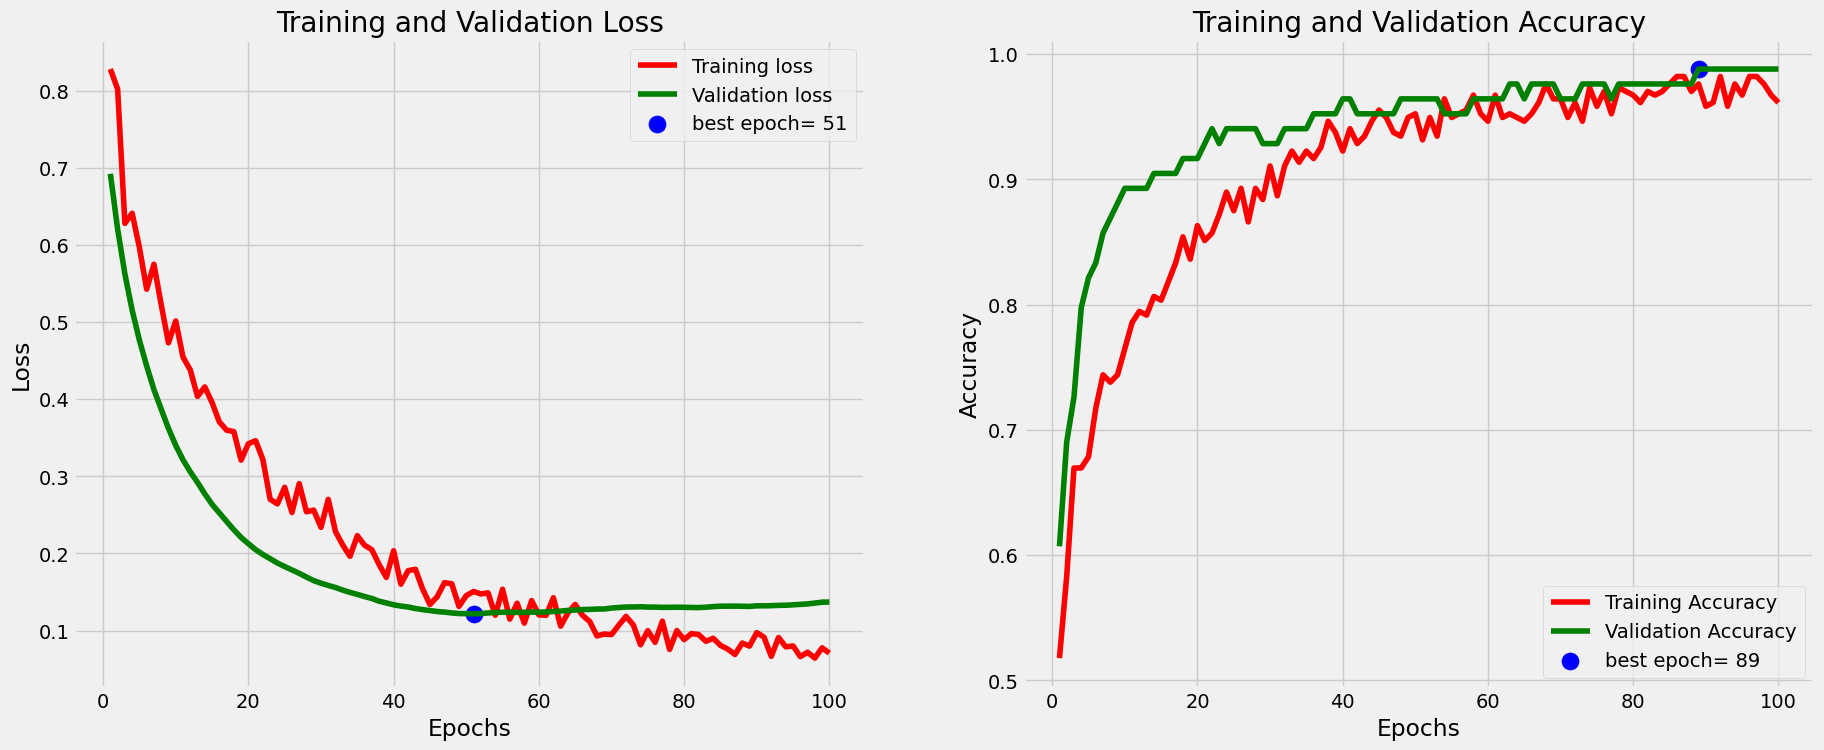

In [37]:
history = model.fit(x_train,y_train,epochs = 100 , validation_split = 0.2)
# Define needed variables
# tr_acc is a list of training accuracy values for each epoch
tr_acc = history.history['accuracy']
# tr_loss is a list of training loss values for each epoch
tr_loss = history.history['loss']
# val_acc is a list of validation accuracy values for each epoch
val_acc = history.history['val_accuracy']
# val_loss is a list of validation loss values for each epoch
val_loss = history.history['val_loss']
# index_loss is the index of the epoch with the lowest validation loss
index_loss = np.argmin(val_loss)
# val_lowest is the lowest validation loss value
val_lowest = val_loss[index_loss]
# index_acc is the index of the epoch with the highest validation accuracy
index_acc = np.argmax(val_acc)
# acc_highest is the highest validation accuracy value
acc_highest = val_acc[index_acc]
# Epochs is a list of epoch numbers from 1 to the number of epochs
Epochs = [i+1 for i in range(len(tr_acc))]
# loss_label is a string that shows the best epoch for validation loss
loss_label = f'best epoch= {str(index_loss + 1)}'
# acc_label is a string that shows the best epoch for validation accuracy
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
# Create a figure with a size of 20 by 8 inches
plt.figure(figsize= (20, 8))
# Use the fivethirtyeight style for the plots
plt.style.use('fivethirtyeight')

# Create a subplot for the loss plot
plt.subplot(1, 2, 1)
# Plot the training loss values in red
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
# Plot the validation loss values in green
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
# Plot a blue dot at the best epoch for validation loss
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
# Set the title, labels and legend for the loss plot
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Create a subplot for the accuracy plot
plt.subplot(1, 2, 2)
# Plot the training accuracy values in red
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
# Plot the validation accuracy values in green
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
# Plot a blue dot at the best epoch for validation accuracy
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
# Set the title, labels and legend for the accuracy plot
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust the spacing between the subplots
plt.tight_layout
# Show the plots
plt.show()

4/4 [==============================] - 0s 3ms/step


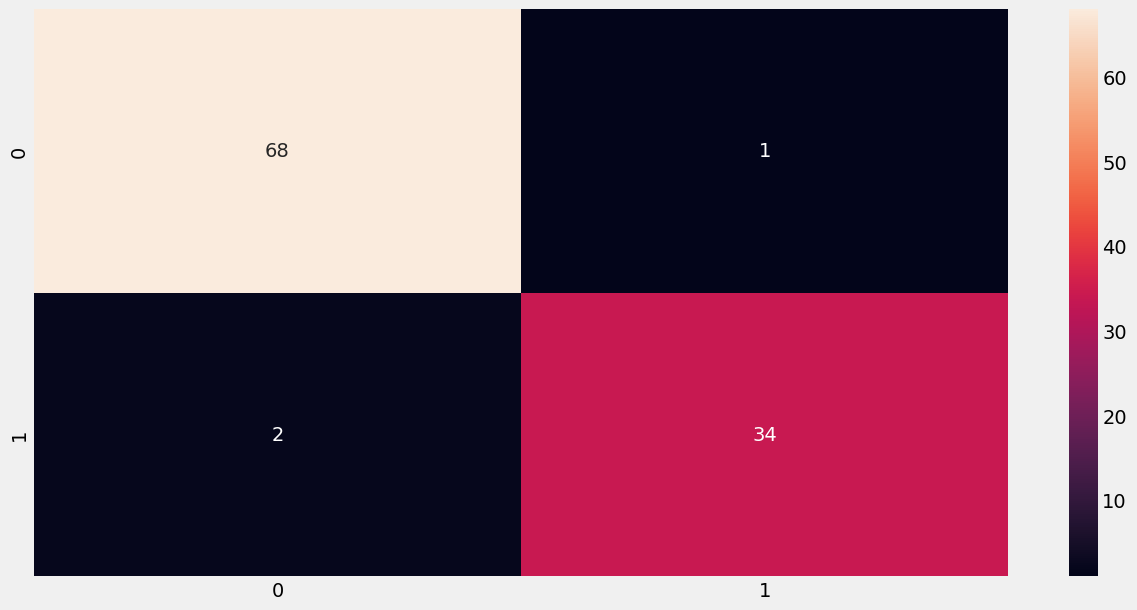

In [38]:
y_pred = model.predict(x_test)

# Convert the probabilities to binary labels (0 or 1)
# Use a threshold of 0.5 to decide the class
# y_pred is a vector of labels for each test instance
y_pred = (y_pred > 0.5)
# Compute the confusion matrix for the test data and the predicted labels
# y_test is a vector of true labels and y_pred is a vector of predicted labels
# cm is a 2D array that shows the number of correct and incorrect predictions for each class
cm = confusion_matrix(y_test, y_pred)

# Create a figure with a size of 14 by 7 inches
plt.figure(figsize=[14,7])

# Plot the confusion matrix as a heatmap
# Use the annot argument to show the values in each cell
# Use the default color scheme
sns.heatmap(cm,annot=True)

# Show the plot
plt.show()



In [39]:
# Calculate accuracy from the confusion matrix
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)

# Print the accuracy
print("Accuracy: {:.2%}".format(accuracy))


Accuracy: 97.14%
